# Build Your Own Machine Learning Algorithm Library

### About
This is the WoC 7.0 Project by _Subrat Panda, Electrical Engineering, IIT (ISM) Dhanbad_.
This project focuses on building different Machine Learning Algorithms, and then combining all in one library.
The following things are to be kept in mind, before reading this Google Colab Notebook:
1. All the algorithms are briefly explained first and then their respective codes are described.
2. The comments in codeblocks are for explanation of codes.
3. Required graphs & visuals are provided at the places, where it's needed, for example, graph showing accuracy and error plots of the algorithms.

The project is made using Python (as the programming language) & the following libraries in Python:
1. NumPy
2. Pandas
3. MatPlotLib

The following Algorithms are made in this project:
1. Linear Regression & Polynomial Regression
2. Logistic Regression
3. K-Nearest Neighbours (KNN)
4. K-Means Clustering
5. Decision Trees
6. N-Layer Neural Network

### Importing Libraries

Let's first of all start with importing all the important libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import time

## Linear Regression Algorithm

A linear regression is a type of Supervised Machine Learning. As the name suggests, this just plots a linear curve for the prediction of outcomes on whatever the dataset, it's implemented upon.

But ofcourse, this results into some error. Well, we'll find error in each & every step but as developers, it's our duty to minimise the error as much as possible.

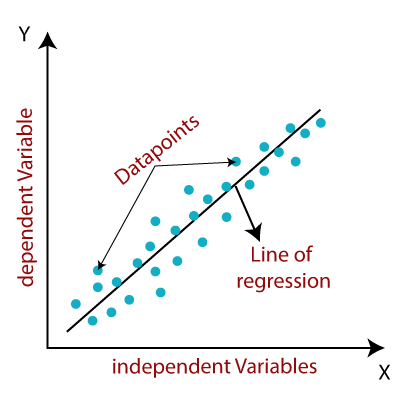

Iteration 0:
Cost: 114581032812.00583
MSE: 6206501.273781784
Weights: [ 0.08599726  0.25322108  0.76837916  0.01395587 -0.38392239 -0.3583493
 -0.96029612 -1.12835201 -0.92782638  0.81248809 -0.419107   -0.60575337
 -0.67116272  1.3043908   0.56455955 -0.27575161 -0.53098314  0.16503151
  0.06936997 -0.30870165 -1.10231157 -0.30092934 -1.22207959 -0.07485527
  0.21747037]

Iteration 100:
Cost: 142041133381.36517
MSE: 1879257.984425579
Weights: [ 1.64151242  1.80075512 11.61363843 13.79067145 -2.33635122  8.95602261
  5.15217285 -7.21647994  9.38709719  7.33873204 -1.07960785 -2.15929833
 11.37748707 15.55166918  3.28391762  6.37942524 -0.76616494  9.23587919
  5.1697132   6.90670717 -2.61806159 -1.46725669 -8.02993411  9.10273256
  0.45696671]

Iteration 200:
Cost: 163057850821.2688
MSE: 1138543.086993146
Weights: [  2.9460349    2.76948053  12.83792335  16.91337417  -3.21168003
  16.86490047   8.16641831 -10.43089902  12.44707221   8.51599681
  -0.86971988  -2.03105204  17.208689    2

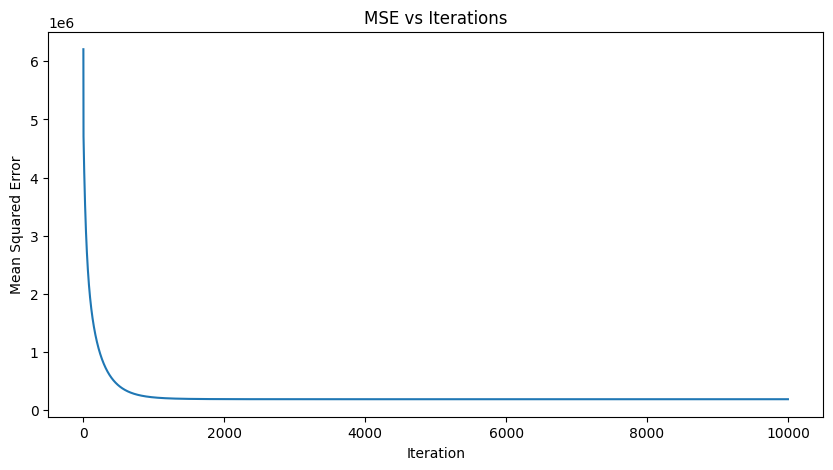

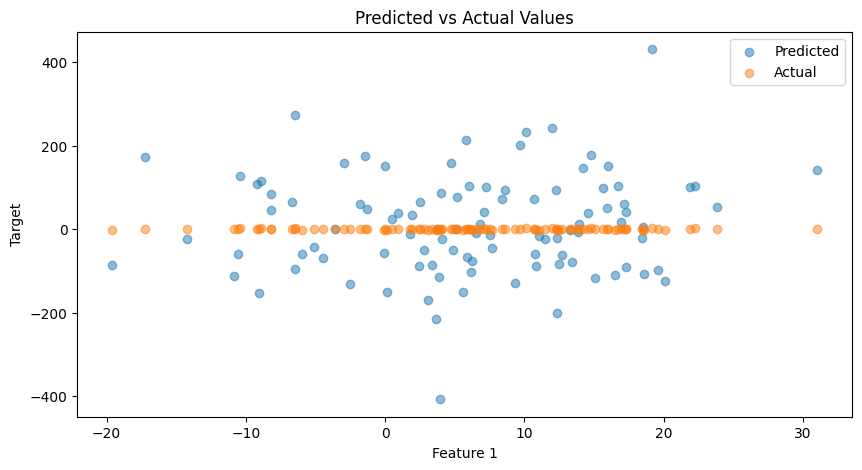

In [ ]:
# Load and prepare the training data
df = pd.read_csv("linear_regression_train.csv")
y = df[['Target']]  # Extract target variable
x_train = df.drop(['ID','Target'], axis=1)  # Remove ID and target columns from features

# Standardize the features and target (z-score normalization)
# This helps with convergence and makes features comparable
y_cvs = (y - np.mean(y, axis=0)) / np.std(y, axis=0)
x_cvs = (x_train - np.mean(x_train, axis=0)) / np.std(x_train, axis=0)

# Function to compute Mean Squared Error
def compute_mse(y_true, y_pred):
    """
    Calculate the Mean Squared Error between true and predicted values
    Parameters:
        y_true: actual target values
        y_pred: predicted values
    Returns:
        float: Mean Squared Error value
    """
    return np.mean(np.square(y_true - y_pred))

# Lambda function to compute the cost (MSE + L2 regularization)
# Parameters:
#   x: feature matrix
#   y: target values
#   w_new: weights
#   b: bias
#   lambda_: regularization parameter
#   m: number of samples
compute_Cost = lambda x,y,w_new,b,lambda_,m: (np.sum(np.square(np.dot(x,w_new)+b-y))+np.sum(np.square(w_new))*lambda_)/(2*m)

# Gradient descent optimization function
def gradient_descent(lambda_, x, y, w, b, learning_rate, iters, m=len(y)):
    """
    Performs gradient descent to find optimal weights and bias
    Parameters:
        lambda_: L2 regularization parameter
        x: feature matrix
        y: target values
        w: initial weights
        b: initial bias
        learning_rate: step size for gradient descent
        iters: number of iterations
        m: number of samples
    Returns:
        w: optimized weights
        b: optimized bias
        mse_history: list of MSE values during training
    """
    mse_history = []  # To track MSE during training

    for i in range(iters):
        # Calculate current predictions
        y_pred = np.dot(x, w) + b

        # Calculate and store current MSE
        current_mse = compute_mse(y.values.ravel(), y_pred)
        mse_history.append(current_mse)

        # Update weights using vectorized operations
        # Formula: w = w - learning_rate * (X^T * (X*w + b - y) + lambda*w)/m
        w -= learning_rate*((np.dot((y_pred - y.values.ravel()).T, x)/m).T + lambda_*np.sum(w)/m)

        # Update bias
        # Formula: b = b - learning_rate * sum(X*w + b - y)/m
        b -= learning_rate*(np.sum((y_pred-y.values.ravel()))/m)

        # Print metrics every 100 iterations to monitor convergence
        if i%100 == 0:
            print(f"Iteration {i}:")
            print(f"Cost: {compute_Cost(x,y.values,w,b,lambda_,m)}")
            print(f"MSE: {current_mse}")
            print(f"Weights: {w}\n")

    return w, b, mse_history

# Train the model with specific hyperparameters
# lambda_=0.01: small regularization to prevent overfitting
# learning_rate=1e-5: very small to ensure stable convergence
# iters=10001: number of iterations chosen empirically
w_final, b_final, mse_history = gradient_descent(0.01, x_train, y, np.zeros(x_train.shape[1]), 0, 1e-5, 10001)

# Make predictions using the trained model
y_pred = np.dot(x_cvs,w_final) + b_final
y_pred = pd.DataFrame(y_pred, columns=['Target'])

# Calculate final MSE
final_mse = compute_mse(y_cvs.values, y_pred.values)
print(f"\nFinal Mean Squared Error: {final_mse}")

# Plot MSE convergence
plt.figure(figsize=(10, 5))
plt.plot(mse_history)
plt.title('MSE vs Iterations')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.show()

# Visualize predictions vs actual values for first 100 samples
plt.figure(figsize=(10, 5))
plt.scatter(x_train.iloc[:100,0], y_pred.iloc[:100,0], label="Predicted", alpha=0.5)
plt.scatter(x_train.iloc[:100,0], y_cvs.iloc[:100,0], label="Actual", alpha=0.5)
plt.title('Predicted vs Actual Values')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.legend()
plt.show()

## Polynomial Regression Algorithm

A Polynomial Regression is simiar to that of a Linear Regression in terms of the Gradient Descent and all those functionings, just the difference being that we use a polynomial of higher degree in this case and hence our predicted curve fits more than a linear regression to the actual values, which in some cases, even give an overfit curve.

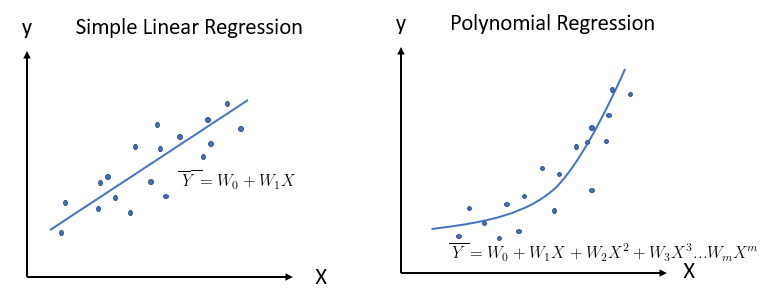

starting
[[ 1.98602169e+00  3.22701610e-01  1.55290346e+00 ...  7.72733074e-01
   1.89355770e+00 -1.00487640e+00]
 [-1.01073602e+00  6.29569686e-01 -1.19860254e+00 ... -5.94998545e-01
  -2.60807461e-01 -1.60514293e+00]
 [ 1.18700689e-01  2.38660279e-01 -1.72166906e+00 ...  1.99925046e+00
  -1.25993223e+00 -8.89870103e-01]
 ...
 [ 1.59703299e-06  1.17798524e-04  5.45895463e-05 ...  1.58084605e-01
   3.72917941e-01  1.43245222e+00]
 [ 3.16455385e+00  1.81743867e-01  6.30298486e+00 ...  4.78252744e-03
   9.09948061e-09  7.69991471e+00]
 [ 2.17165568e-07  9.40662818e-02  1.57260969e-05 ...  4.53690410e-05
   5.47465421e+00  1.32195370e-02]]
(40000, 209)
shape of x after feature scaling is  (40000, 3875)
Cost after iteration 0: 5.714553582348408e-17
 w: [-4.77287631e-18 -7.76156779e-18  4.46730400e-18 ...  9.30194957e-19
  2.62531948e-19  6.41385332e-19] 
 b: -2.6319631531906467e-17
Cost after iteration 1000: 5.714453811298172e-17
 w: [-4.77657623e-15 -7.76879781e-15  4.47096878e-15 ...  9.

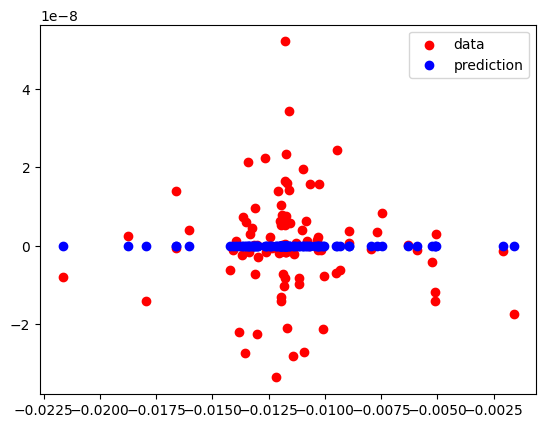

In [ ]:
# Load and preprocess data
pr_df = pd.read_csv("polynomial_regression_train.csv")
X_train1 = pr_df.drop(['ID','Target'], axis=1)    # Remove ID and target columns
y_train1 = pr_df[['Target']]   # Extract target variable

# Split data: first 40k samples for training
# Shuffle using sample() and extract values using pipe for efficiency
X_train = X_train1.sample(frac=1).reset_index(drop=True).pipe(lambda df: (df.iloc[:40000, 1:].values))
y_train = y_train1.iloc[:40000, 0].values

# Remaining data for cross-validation
x_cvx = X_train1.iloc[40000:,1: ].values
y_cvx = y_train1.iloc[40000:, 0].values

def normalize(X, method='z-score'):
    """Feature normalization using z-score or min-max scaling"""
    epsilon = 1e-4  # Prevents division by zero
    if method == 'z-score':
        # (x - mean)/(std + ε)
        return (X - np.mean(X, axis=0)) / (np.std(X, axis=0) + epsilon), np.mean(X, axis=0), np.std(X, axis=0)
    elif method == 'min-max':
        # (x - min)/(max - min + ε)
        return (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0) + epsilon), np.min(X, axis=0), (np.max(X, axis=0) - np.min(X, axis=0) + epsilon)
    else:
        return X

def polynomialFeatures(X1, degree=4):
    """Generate polynomial features efficiently using recursive multiplication"""
    X = X1.T    # Transpose for easier feature generation
    features = (X).copy()
    prev_chunk = X
    indices = list(range(len(X)))

    # Generate higher degree terms
    for d in range(1, degree):
        new_chunk = []
        for i, v in enumerate(X):
            next_index = len(new_chunk)
            # Multiply current feature with previous combinations
            for coef in prev_chunk[indices[i]:]:
                new_chunk.append(v*coef)
            indices[i] = next_index
        features = np.append(features, new_chunk)
        prev_chunk = new_chunk
    features = np.reshape(features, (X.shape[1], -1))
    return features

print("starting")
x_train2 = (polynomialFeatures(X_train,6))
print(x_train2)
print(np.shape(x_train2))

# Cost function with L2 regularization
# MSE + λ(weights²)/2m
compute_Cost = lambda x,y,w_new,b,lambda_,m: (np.sum(np.square(np.dot(x,w_new)+b-y))+np.sum(np.square(w_new))*lambda_)/(2*m)

def gradient_descent(lambda_,x,y,w,b,learning_rate,iters):
    """Gradient descent optimization with L2 regularization"""
    m = len(y)
    for i in range(iters):
        # Update weights: w = w - α((X'(Xw + b - y))/m + λw/m)
        w -= learning_rate*((np.dot(((np.dot(x,w) +b) - y).T, x)/m).T + lambda_*np.sum(w)/m)
        # Update bias: b = b - α(sum(Xw + b - y))/m
        b -= learning_rate*(np.sum((np.dot(x,w)+b-y))/m)
        # Print progress every 1000 iterations
        if i%1000 == 0: print(f"Cost after iteration {i}: {compute_Cost(x,y,w,b,lambda_,m)}\n w: {w} \n b: {b}")
    return w,b

# R² score calculation using vectorized operations
r2 = lambda y_true, y_pred: 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)

def polyreg(x,y,x_cvs,y_cvs,lamda,alpha,iters,degree,norm=None):
    """Complete polynomial regression pipeline"""
    # Generate polynomial features for training data
    x = polynomialFeatures(x, degree)
    print("shape of x after feature scaling is ", np.shape(x))

    if norm:
        # Normalize training data and transform validation data
        x,val1,val2 = normalize(x, method=norm)
        x_cvs = polynomialFeatures(x_cvs, degree)
        x_cvs = (x_cvs - val1)/val2
    else:
        x_cvs = polynomialFeatures(x_cvs, degree)

    # Initialize parameters
    w = np.zeros(x.shape[1])
    b = 0

    # Train model
    w,b = gradient_descent(lamda,x,y,w,b,alpha,iters)

    # Make predictions
    y_pred = np.dot(x_cvs,w)+b

    # Evaluate and visualize
    print("R² score is ", r2(y_cvs,y_pred))
    plt.scatter(x_cvs[:100, 0], y_cvs[:100], color='red', label='data')
    plt.scatter(x_cvs[:100, 0], y_pred[:100], color='blue',label='prediction')
    plt.legend()
    plt.show()
    return w,b

# Train model with specified hyperparameters:
# degree=15: polynomial features up to 10th degree
# alpha=9e-8: learning rate
# iters=10000: number of iterations
# z-score normalization
w,b = polyreg(X_train,y_train,x_cvx,y_cvx,0,9e-8,10000,15,'z-score')

## Logistic Regression Algorithm

A logistic regression works in the similar way, just the difference is that instead of any linear function, it uses the sigmoid function.

The sigmoid function is defined as:

f(x) = 1/(1 + exp(-x))

This gives a better result if we need our output as 0 or 1 only.

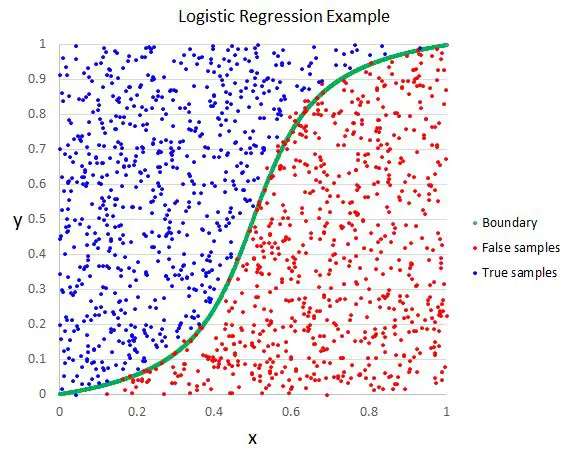

### Binary Classification Dataset

Epoch 100:
Loss: 0.2468, Accuracy: 0.9350
F1 Score: 0.8943, Precision: 0.9278, Recall: 0.8631

Epoch 200:
Loss: 0.2468, Accuracy: 0.9351
F1 Score: 0.8943, Precision: 0.9281, Recall: 0.8629

Epoch 300:
Loss: 0.2467, Accuracy: 0.9351
F1 Score: 0.8943, Precision: 0.9283, Recall: 0.8627

Epoch 400:
Loss: 0.2467, Accuracy: 0.9350
F1 Score: 0.8942, Precision: 0.9280, Recall: 0.8627

Epoch 500:
Loss: 0.2467, Accuracy: 0.9350
F1 Score: 0.8941, Precision: 0.9279, Recall: 0.8627

Epoch 600:
Loss: 0.2467, Accuracy: 0.9349
F1 Score: 0.8941, Precision: 0.9279, Recall: 0.8626

Epoch 700:
Loss: 0.2467, Accuracy: 0.9349
F1 Score: 0.8940, Precision: 0.9279, Recall: 0.8626

Epoch 800:
Loss: 0.2467, Accuracy: 0.9349
F1 Score: 0.8941, Precision: 0.9279, Recall: 0.8626

Epoch 900:
Loss: 0.2467, Accuracy: 0.9349
F1 Score: 0.8941, Precision: 0.9280, Recall: 0.8626

Epoch 1000:
Loss: 0.2467, Accuracy: 0.9349
F1 Score: 0.8941, Precision: 0.9280, Recall: 0.8626



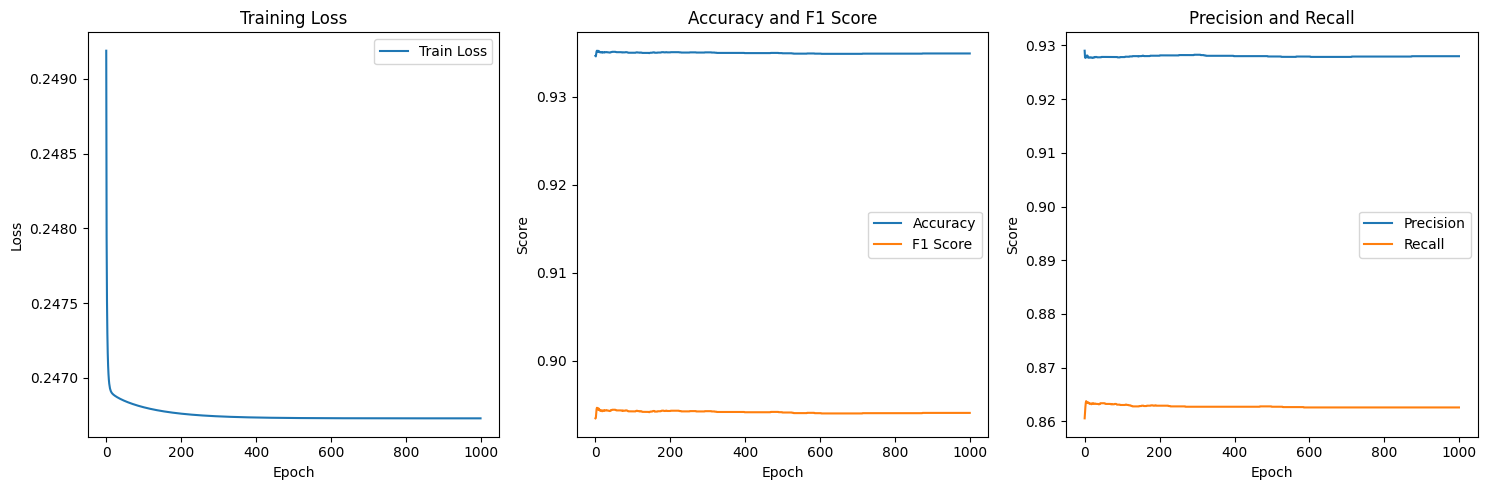

In [ ]:
# Core functions using lambda for computational efficiency
# Softmax function for probability distribution
# Stable implementation using keepdims for proper broadcasting
softmax = lambda z: np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)

# Cross-entropy loss calculation
# Using element-wise multiplication and log for numerical stability
cross_entropy_loss = lambda y, y_pred: -np.mean(np.sum(y * np.log(y_pred + 1e-10), axis=1))

# Binary classification accuracy using argmax comparison
accuracy = lambda y_true, y_pred: np.mean(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))

def calculate_f1_score(y_true, y_pred):
    """
    Calculate F1 score for binary classification

    Parameters:
        y_true: true labels (one-hot encoded)
        y_pred: predicted probabilities

    Returns:
        float: F1 score
    """
    # Convert predictions to binary format
    y_pred_binary = np.argmax(y_pred, axis=1)
    y_true_binary = np.argmax(y_true, axis=1)

    # Calculate True Positives, False Positives, False Negatives
    true_positives = np.sum((y_pred_binary == 1) & (y_true_binary == 1))
    false_positives = np.sum((y_pred_binary == 1) & (y_true_binary == 0))
    false_negatives = np.sum((y_pred_binary == 0) & (y_true_binary == 1))

    # Calculate Precision and Recall
    precision = true_positives / (true_positives + false_positives + 1e-10)  # Add small epsilon to avoid division by zero
    recall = true_positives / (true_positives + false_negatives + 1e-10)

    # Calculate F1 Score
    f1_score = 2 * (precision * recall) / (precision + recall + 1e-10)

    return f1_score, precision, recall

# Load binary classification dataset
binclass_df = pd.read_csv("binary_classification_train.csv")

def logreg(batch_size, alpha, epochs, df):
    """
    Binary Logistic Regression with mini-batch gradient descent

    Parameters:
        batch_size: size of mini-batches
        alpha: learning rate for gradient descent
        epochs: number of training iterations
        df: input dataframe with features and binary labels
    """
    # Initialize metrics tracking
    train_loss, test_loss, train_acc, test_acc = [], [], [], []
    train_f1, train_precision, train_recall = [], [], []  # New metrics
    b = 0  # Initialize bias term

    # Binary classification setup (2 classes: 0 and 1)
    num_classes = 2
    # Initialize weights: features × 2 classes
    w = np.zeros((df.shape[1] - 2, num_classes))

    for epoch in range(epochs):
        # Prepare training data
        y_train = binclass_df[['Class']]  # Binary labels
        x_train = binclass_df.drop(['ID','Class'], axis=1)  # Features

        # Mini-batch training loop
        for i in range(0, x_train.shape[0], batch_size):
            # Forward pass: compute logits
            z = np.dot(x_train[i:i + batch_size], w) + b

            # Prepare batch labels
            y_train_batch = y_train[i:i + batch_size].values
            y_train_batch = y_train_batch.reshape(-1, 1)

            # One-hot encode batch labels
            y_train_encoded = np.zeros((y_train_batch.shape[0], num_classes))
            # Ensure labels are in {0,1}
            y_train_clipped = np.clip(y_train_batch.astype(int).flatten(), 0, num_classes - 1)
            y_train_encoded[np.arange(y_train_batch.shape[0]), y_train_clipped] = 1

            # Gradient descent updates
            # Weight update: w = w - α * X^T * (softmax(z) - y)
            w = w - alpha*(np.dot(x_train[i:i+batch_size].T, softmax(z) - y_train_encoded))
            # Bias update: b = b - α * sum(softmax(z) - y)
            b = b - alpha*(np.sum(softmax(z) - y_train_encoded, axis=0, keepdims=True))

        # Compute predictions for full training set
        y_pred_train = softmax(np.dot(x_train, w) + b)

        # One-hot encode full training set
        y_train_encoded_full = np.zeros((y_train.shape[0], num_classes))
        y_train_clipped_full = np.clip(y_train.values.astype(int).flatten(), 0, num_classes - 1)
        y_train_encoded_full[np.arange(y_train.shape[0]), y_train_clipped_full] = 1

        # Calculate metrics
        curr_loss = cross_entropy_loss(y_train_encoded_full, y_pred_train)
        curr_acc = accuracy(y_train_encoded_full, y_pred_train)
        curr_f1, curr_precision, curr_recall = calculate_f1_score(y_train_encoded_full, y_pred_train)

        # Track metrics
        train_loss.append(curr_loss)
        train_acc.append(curr_acc)
        train_f1.append(curr_f1)
        train_precision.append(curr_precision)
        train_recall.append(curr_recall)

        # Print progress every 100 epochs
        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch+1}:")
            print(f"Loss: {curr_loss:.4f}, Accuracy: {curr_acc:.4f}")
            print(f"F1 Score: {curr_f1:.4f}, Precision: {curr_precision:.4f}, Recall: {curr_recall:.4f}\n")

    return train_loss, train_acc, train_f1, train_precision, train_recall, w, b

# Train model with specified hyperparameters:
# batch_size=100: for memory efficiency
# alpha=9e-8: learning rate tuned for binary classification
# epochs=1000: training iterations
train_loss, train_acc, train_f1, train_precision, train_recall, w, b = logreg(100, 9e-8, 1000, binclass_df)

# Visualize training progress
plt.figure(figsize=(15, 5))

# Loss curve
plt.subplot(1, 3, 1)
plt.plot(train_loss, label="Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()

# Accuracy curve
plt.subplot(1, 3, 2)
plt.plot(train_acc, label="Accuracy")
plt.plot(train_f1, label="F1 Score")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("Accuracy and F1 Score")
plt.legend()

# Precision-Recall curve
plt.subplot(1, 3, 3)
plt.plot(train_precision, label="Precision")
plt.plot(train_recall, label="Recall")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("Precision and Recall")
plt.legend()

plt.tight_layout()
plt.show()

### Multiple Classification Dataset

Number of classes detected: 5

Epoch 100:
Loss: 0.5170, Accuracy: 0.8337
F1 Score: 0.7956, Precision: 0.8164, Recall: 0.7821
F1 Scores per class: {0: 0.6480239691336286, 1: 0.8896947717843952, 2: 0.8790018831891905, 3: 0.797577519329868, 4: 0.763655837151104}

Epoch 200:
Loss: 0.5158, Accuracy: 0.8343
F1 Score: 0.7967, Precision: 0.8168, Recall: 0.7836
F1 Scores per class: {0: 0.6508909479197725, 1: 0.8900224796318281, 2: 0.8787798486088524, 3: 0.7987583062021424, 4: 0.7648363345548831}

Epoch 300:
Loss: 0.5157, Accuracy: 0.8345
F1 Score: 0.7970, Precision: 0.8170, Recall: 0.7840
F1 Scores per class: {0: 0.6507054296219283, 1: 0.890128421275725, 2: 0.8788432088085402, 3: 0.7993401901304971, 4: 0.7657689581357534}

Epoch 400:
Loss: 0.5157, Accuracy: 0.8345
F1 Score: 0.7969, Precision: 0.8167, Recall: 0.7840
F1 Scores per class: {0: 0.6511892892261509, 1: 0.890205405355407, 2: 0.878880706871961, 3: 0.7993012421860443, 4: 0.7648725211965255}

Epoch 500:
Loss: 0.5157, Accuracy: 0.8344
F1 S

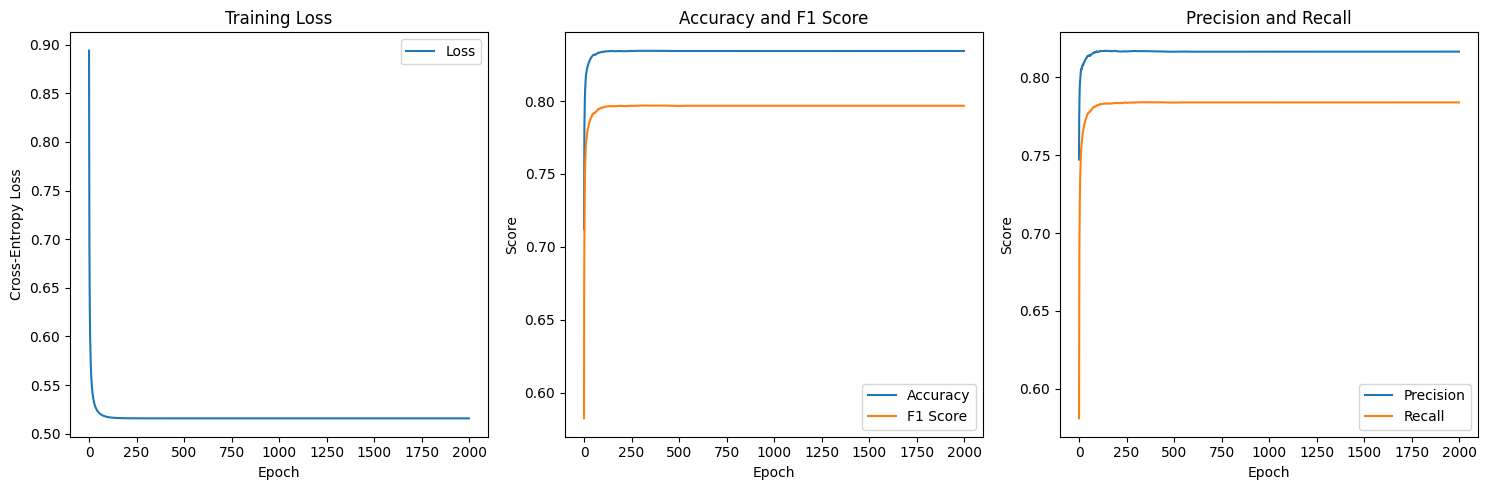

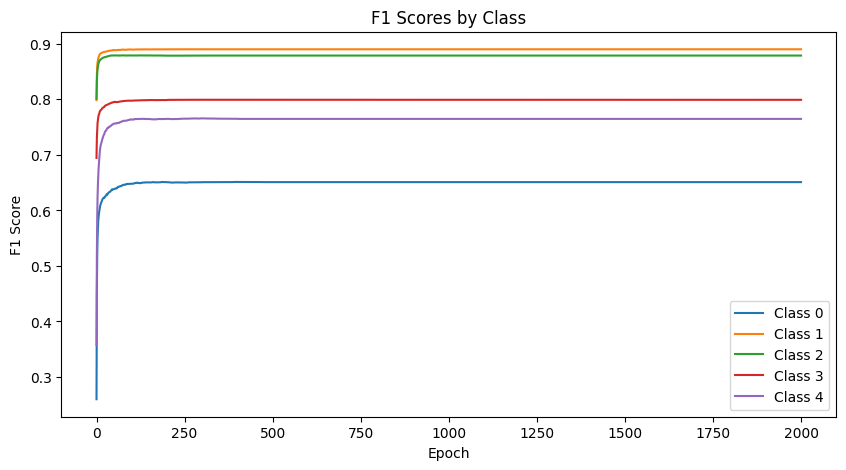

In [ ]:
# Define softmax function to calculate class probabilities
softmax = lambda z: np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)

# Define cross-entropy loss function with numerical stability
cross_entropy_loss = lambda y, y_pred: -np.mean(np.sum(y * np.log(y_pred + 1e-10), axis=1))

# Define accuracy calculation function
accuracy = lambda y_true, y_pred: np.mean(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))

def calculate_multiclass_f1(y_true, y_pred, average='macro'):
    """
    Calculate F1 score for multi-class classification

    Parameters:
        y_true: one-hot encoded true labels
        y_pred: predicted probabilities
        average: method to average F1 scores ('macro' or 'weighted')

    Returns:
        float: F1 score, precision, recall for each class
    """
    num_classes = y_true.shape[1]
    f1_scores = np.zeros(num_classes)
    precisions = np.zeros(num_classes)
    recalls = np.zeros(num_classes)

    # Convert predictions to class labels
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_true, axis=1)

    # Calculate metrics for each class
    for class_idx in range(num_classes):
        # True Positives, False Positives, False Negatives
        true_positives = np.sum((y_pred_labels == class_idx) & (y_true_labels == class_idx))
        false_positives = np.sum((y_pred_labels == class_idx) & (y_true_labels != class_idx))
        false_negatives = np.sum((y_pred_labels != class_idx) & (y_true_labels == class_idx))

        # Calculate Precision and Recall for the class
        precision = true_positives / (true_positives + false_positives + 1e-10)
        recall = true_positives / (true_positives + false_negatives + 1e-10)

        # Calculate F1 Score for the class
        f1_scores[class_idx] = 2 * (precision * recall) / (precision + recall + 1e-10)
        precisions[class_idx] = precision
        recalls[class_idx] = recall

    # Average the scores based on the specified method
    if average == 'weighted':
        # Weight by class support
        class_weights = np.sum(y_true, axis=0) / np.sum(y_true)
        avg_f1 = np.sum(f1_scores * class_weights)
        avg_precision = np.sum(precisions * class_weights)
        avg_recall = np.sum(recalls * class_weights)
    else:  # macro average
        avg_f1 = np.mean(f1_scores)
        avg_precision = np.mean(precisions)
        avg_recall = np.mean(recalls)

    return avg_f1, avg_precision, avg_recall, f1_scores

# Load dataset for multi-class classification
multiclass_df = pd.read_csv("multi_classification_train.csv")

def logreg(batch_size, alpha, epochs, df):
    """
    Train a multi-class logistic regression model using batch gradient descent.

    Parameters:
    - batch_size: int, number of samples per batch
    - alpha: float, learning rate
    - epochs: int, number of iterations to train
    - df: pandas.DataFrame, input dataset with features and target class

    Returns:
    - training metrics history
    - model parameters
    """
    # Initialize metrics tracking
    train_loss, train_acc = [], []
    train_f1, train_precision, train_recall = [], [], []
    class_f1_history = []
    b = 0  # Initialize bias

    # Get number of unique classes from the data
    num_classes = len(df['Class'].unique())
    print(f"Number of classes detected: {num_classes}")

    # Initialize weights
    w = np.zeros((df.shape[1] - 2, num_classes))

    for epoch in range(epochs):
        # Prepare training data
        y_train = df[['Class']]
        x_train = df.drop(['ID', 'Class'], axis=1)

        # Mini-batch training
        for i in range(0, x_train.shape[0], batch_size):
            z = np.dot(x_train[i:i + batch_size], w) + b
            y_train_batch = y_train[i:i + batch_size].values
            y_train_batch = y_train_batch.reshape(-1, 1)

            # One-hot encode batch labels
            y_train_encoded = np.zeros((y_train_batch.shape[0], num_classes))
            y_train_clipped = np.clip(y_train_batch.astype(int).flatten(), 0, num_classes - 1)
            y_train_encoded[np.arange(y_train_batch.shape[0]), y_train_clipped] = 1

            # Gradient descent updates
            w -= alpha * (np.dot(x_train[i:i + batch_size].T, softmax(z) - y_train_encoded))
            b -= alpha * (np.sum(softmax(z) - y_train_encoded, axis=0, keepdims=True))

        # Evaluate model on full training set
        y_pred_train = softmax(np.dot(x_train, w) + b)

        # One-hot encode full training set
        y_train_encoded_full = np.zeros((y_train.shape[0], num_classes))
        y_train_clipped_full = np.clip(y_train.values.astype(int).flatten(), 0, num_classes - 1)
        y_train_encoded_full[np.arange(y_train.shape[0]), y_train_clipped_full] = 1

        # Calculate metrics
        curr_loss = cross_entropy_loss(y_train_encoded_full, y_pred_train)
        curr_acc = accuracy(y_train_encoded_full, y_pred_train)
        curr_f1, curr_precision, curr_recall, class_f1s = calculate_multiclass_f1(
            y_train_encoded_full, y_pred_train, average='macro'
        )

        # Track metrics
        train_loss.append(curr_loss)
        train_acc.append(curr_acc)
        train_f1.append(curr_f1)
        train_precision.append(curr_precision)
        train_recall.append(curr_recall)
        class_f1_history.append(class_f1s)

        # Print progress every 100 epochs
        if (epoch + 1) % 100 == 0:
            print(f"\nEpoch {epoch + 1}:")
            print(f"Loss: {curr_loss:.4f}, Accuracy: {curr_acc:.4f}")
            print(f"F1 Score: {curr_f1:.4f}, Precision: {curr_precision:.4f}, Recall: {curr_recall:.4f}")
            print("F1 Scores per class:", dict(enumerate(class_f1s)))

    return {
        'loss': train_loss,
        'accuracy': train_acc,
        'f1': train_f1,
        'precision': train_precision,
        'recall': train_recall,
        'class_f1': class_f1_history,
        'weights': w,
        'bias': b
    }

# Train the model
results = logreg(batch_size=100, alpha=9e-9, epochs=2000, df=multiclass_df)

# Visualize training progress
plt.figure(figsize=(15, 5))

# Plot training loss
plt.subplot(1, 3, 1)
plt.plot(results['loss'], label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Cross-Entropy Loss")
plt.title("Training Loss")
plt.legend()

# Plot accuracy and F1 score
plt.subplot(1, 3, 2)
plt.plot(results['accuracy'], label="Accuracy")
plt.plot(results['f1'], label="F1 Score")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("Accuracy and F1 Score")
plt.legend()

# Plot precision-recall
plt.subplot(1, 3, 3)
plt.plot(results['precision'], label="Precision")
plt.plot(results['recall'], label="Recall")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("Precision and Recall")
plt.legend()

plt.tight_layout()
plt.show()

# Plot F1 scores for each class
plt.figure(figsize=(10, 5))
class_f1_history = np.array(results['class_f1'])
for i in range(class_f1_history.shape[1]):
    plt.plot(class_f1_history[:, i], label=f'Class {i}')
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.title("F1 Scores by Class")
plt.legend()
plt.show()

## N-layer Neural Network

Suppose, we define a node where we are implementing one of the ML model for once, say Linear or Logistic Regression. Then, it gives an output & we can connect a lot of nodes together, output of one shall act as input for the another, and this is the way how the human nervous system also works! One neuron is connected to another and signals are transmitted in this manner. This whole system is known as Neural Networks.

When we have only one layer of nodes, it's a single layered Neural Network, but obviously, for better performance, we need more layers of nodes, which leads to N-layer Neural Networks.

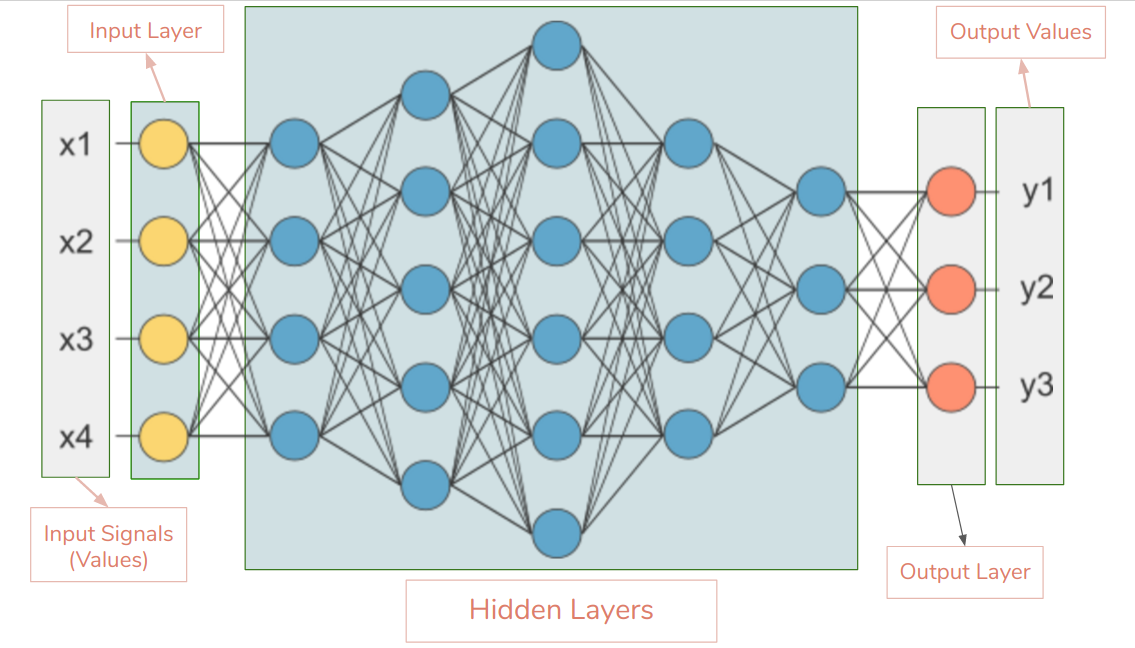


Iteration 0:
Cost: -0.0000
Accuracy: 100.00%
Macro F1 Score: 1.0000
Class 0 F1: 1.0000

Iteration 100:
Cost: -0.0000
Accuracy: 100.00%
Macro F1 Score: 1.0000
Class 0 F1: 1.0000

Iteration 200:
Cost: -0.0000
Accuracy: 100.00%
Macro F1 Score: 1.0000
Class 0 F1: 1.0000


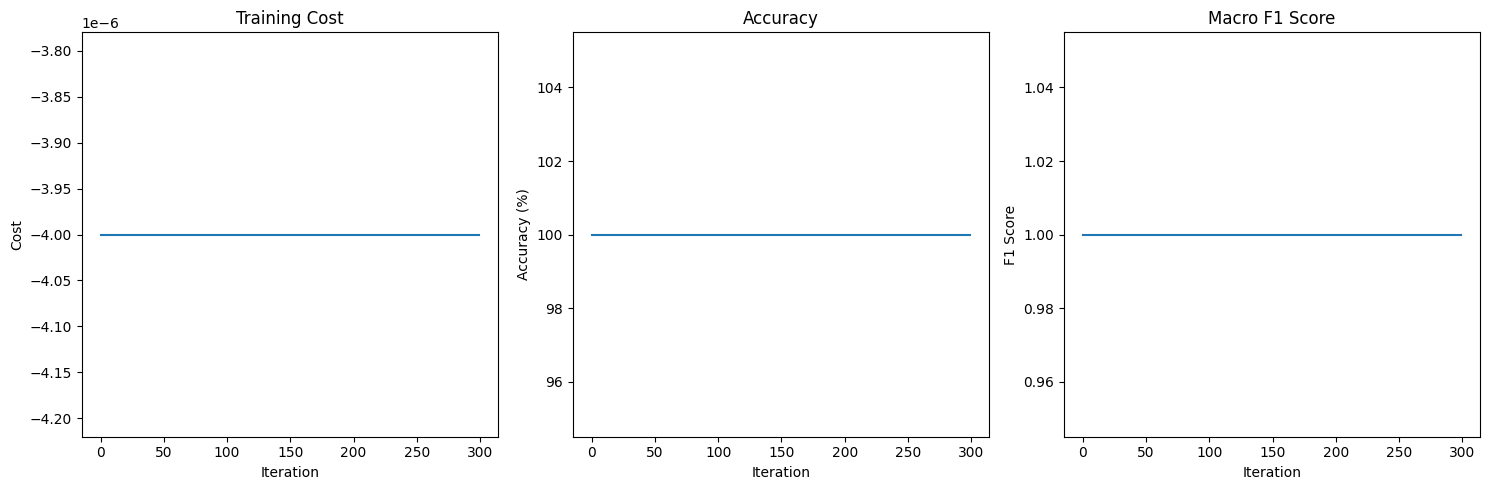

In [ ]:
# Load the training and test datasets
nn_df = pd.read_csv("nn_train.csv")

# Prepare input features (X) and target labels (Y)
x_train = nn_df.drop(['ID', 'binary_label', 'class_label'], axis=1)  # Drop irrelevant columns
y_train = nn_df[['binary_label']]  # Extract the binary label for classification

# Convert labels to one-hot encoding for multi-class classification
y_train = pd.get_dummies(y_train, dtype='int').values.T

# Normalize input features to bring them into the range [0, 1]
x_train = x_train.T / 255  # Transpose and scale data

# Define activation functions
relu = lambda z: np.maximum(0, z)  # ReLU activation
tanh = lambda z: np.tanh(z)        # Tanh activation
softmax = lambda z: np.exp(z) / np.sum(np.exp(z), axis=0)  # Softmax for output layer

# Define derivatives for backpropagation
tanh_derivative = lambda z: 1 - np.power(tanh(z), 2)  # Derivative of tanh
relu_derivative = lambda z: np.where(z > 0, 1, 0)    # Derivative of ReLU

# Function to compute cost using cross-entropy loss
compute_cost = lambda AL, Y: -np.sum(Y * np.log(AL + 1e-10))  # Cross-entropy loss with numerical stability

def calculate_f1_metrics(y_true, y_pred):
    """
    Calculate F1 score and related metrics for neural network output

    Args:
        y_true: True labels (one-hot encoded)
        y_pred: Predicted probabilities

    Returns:
        Dictionary containing F1 score, precision, recall for each class and macro averages
    """
    # Convert predictions and true labels to class indices
    pred_classes = np.argmax(y_pred, axis=0)
    true_classes = np.argmax(y_true, axis=0)

    num_classes = y_true.shape[0]
    metrics = {
        'class_metrics': [],
        'macro_avg': {}
    }

    # Calculate metrics for each class
    for class_idx in range(num_classes):
        # True Positives, False Positives, False Negatives
        true_positives = np.sum((pred_classes == class_idx) & (true_classes == class_idx))
        false_positives = np.sum((pred_classes == class_idx) & (true_classes != class_idx))
        false_negatives = np.sum((pred_classes != class_idx) & (true_classes == class_idx))

        # Calculate precision and recall
        precision = true_positives / (true_positives + false_positives + 1e-10)
        recall = true_positives / (true_positives + false_negatives + 1e-10)

        # Calculate F1 score
        f1 = 2 * (precision * recall) / (precision + recall + 1e-10)

        metrics['class_metrics'].append({
            'class': class_idx,
            'precision': precision,
            'recall': recall,
            'f1': f1
        })

    # Calculate macro averages
    metrics['macro_avg'] = {
        'precision': np.mean([m['precision'] for m in metrics['class_metrics']]),
        'recall': np.mean([m['recall'] for m in metrics['class_metrics']]),
        'f1': np.mean([m['f1'] for m in metrics['class_metrics']])
    }

    return metrics

def initialize_parameters(layers_dim):
    """
    Initializes weights and biases for the neural network.
    Args:
        layers_dim: List containing dimensions of each layer in the network.
    Returns:
        parameters: Dictionary of initialized weights and biases.
    """
    parameters = {}
    for i in range(1, len(layers_dim)):
        # He initialization for weights
        parameters["w" + str(i)] = np.random.randn(layers_dim[i], layers_dim[i - 1]) * np.sqrt(2 / layers_dim[i - 1])
        # Initialize biases to zeros
        parameters["b" + str(i)] = np.zeros((layers_dim[i], 1))
    return parameters

def forward_propagation(X, parameters, activation):
    """
    Implements forward propagation through the network.
    Args:
        X: Input data.
        parameters: Dictionary of weights and biases.
        activation: Activation function for hidden layers ('relu' or 'tanh').
    Returns:
        A: Final output after forward propagation.
        caches: Dictionary of intermediate values (Z and A) for backpropagation.
    """
    caches = {}
    A = X
    L = len(parameters) // 2  # Number of layers
    for l in range(1, L + 1):
        A_prev = A
        Z = np.dot(parameters['w' + str(l)], A_prev) + parameters['b' + str(l)]
        # Apply activation function
        if activation == 'tanh' and l != L:
            A = tanh(Z)
        elif activation == 'relu' and l != L:
            A = relu(Z)
        else:  # Softmax for the output layer
            A = softmax(Z)
        # Cache intermediate values
        caches['Z' + str(l)] = Z
        caches['A' + str(l)] = A
    return A, caches

def backward_propagation(AL, X, Y, caches, parameters, activation, learning_rate):
    """
    Implements backward propagation to update weights and biases.
    Args:
        AL: Final activation from forward propagation.
        X: Input data.
        Y: True labels.
        caches: Intermediate values from forward propagation.
        parameters: Dictionary of weights and biases.
        activation: Activation function for hidden layers ('relu' or 'tanh').
        learning_rate: Learning rate for gradient descent.
    Returns:
        parameters: Updated weights and biases.
    """
    grads = {}
    L = len(parameters) // 2  # Number of layers
    m = AL.shape[1]           # Number of examples

    # Compute gradients for the output layer
    dZ = AL - Y
    grads["dw" + str(L)] = 1. / m * np.dot(dZ, caches['A' + str(L - 1)].T)
    grads["db" + str(L)] = 1. / m * np.sum(dZ, axis=1, keepdims=True)

    # Backpropagate through hidden layers
    for l in reversed(range(L - 1)):
        dA_prev = np.dot(parameters['w' + str(l + 2)].T, dZ)
        if activation == 'tanh':
            dZ = np.multiply(dA_prev, tanh_derivative(caches['Z' + str(l + 1)]))
        elif activation == 'relu':
            dZ = np.multiply(dA_prev, relu_derivative(caches['Z' + str(l + 1)]))
        grads["dw" + str(l + 1)] = 1. / m * np.dot(dZ, caches['A' + str(l)].T if l != 0 else X.T)
        grads["db" + str(l + 1)] = 1. / m * np.sum(dZ, axis=1, keepdims=True)

    # Update weights and biases using gradient descent
    for l in range(L):
        parameters["w" + str(l + 1)] -= learning_rate * grads["dw" + str(l + 1)]
        parameters["b" + str(l + 1)] -= learning_rate * grads["db" + str(l + 1)]

    return parameters

def evaluate_model(X, Y, parameters, activation):
    """
    Evaluates the model's performance using multiple metrics.
    Args:
        X: Input data.
        Y: True labels.
        parameters: Dictionary of weights and biases.
        activation: Activation function for hidden layers.
    Returns:
        Dictionary containing accuracy and F1-related metrics.
    """
    # Get model predictions
    AL, _ = forward_propagation(X, parameters, activation)

    # Calculate accuracy
    predictions = np.argmax(AL, axis=0)
    true_labels = np.argmax(Y, axis=0)
    accuracy = np.mean(predictions == true_labels) * 100

    # Calculate F1 score and related metrics
    f1_metrics = calculate_f1_metrics(Y, AL)

    return {
        'accuracy': accuracy,
        'f1_metrics': f1_metrics
    }

def train_model(X, Y, layers_dim, activation='relu', learning_rate=0.96, num_iterations=300):
    """
    Trains the neural network using forward and backward propagation.
    Args:
        X: Input data.
        Y: True labels.
        layers_dim: List containing dimensions of each layer.
        activation: Activation function for hidden layers ('relu' or 'tanh').
        learning_rate: Learning rate for gradient descent.
        num_iterations: Number of training iterations.
    Returns:
        parameters: Trained weights and biases.
        history: Training history including costs and metrics.
    """
    parameters = initialize_parameters(layers_dim)
    history = {
        'cost': [],
        'accuracy': [],
        'f1_score': []
    }

    for i in range(num_iterations):
        # Forward propagation
        AL, caches = forward_propagation(X, parameters, activation)

        # Compute cost and metrics
        cost = compute_cost(AL, Y)
        metrics = evaluate_model(X, Y, parameters, activation)

        # Store metrics
        history['cost'].append(cost)
        history['accuracy'].append(metrics['accuracy'])
        history['f1_score'].append(metrics['f1_metrics']['macro_avg']['f1'])

        # Print progress every 100 iterations
        if i % 100 == 0:
            print(f"\nIteration {i}:")
            print(f"Cost: {cost:.4f}")
            print(f"Accuracy: {metrics['accuracy']:.2f}%")
            print(f"Macro F1 Score: {metrics['f1_metrics']['macro_avg']['f1']:.4f}")
            # Print per-class metrics
            for class_metric in metrics['f1_metrics']['class_metrics']:
                print(f"Class {class_metric['class']} F1: {class_metric['f1']:.4f}")

        # Backward propagation and update parameters
        parameters = backward_propagation(AL, X, Y, caches, parameters, activation, learning_rate)

    return parameters, history

# Train the model
param, history = train_model(
    x_train, y_train,
    layers_dim=[x_train.shape[0], 4, 3, y_train.shape[0]],
    activation='relu'
)

# Visualize training progress

plt.figure(figsize=(15, 5))

# Plot training cost
plt.subplot(1, 3, 1)
plt.plot(history['cost'])
plt.title('Training Cost')
plt.xlabel('Iteration')
plt.ylabel('Cost')

# Plot accuracy
plt.subplot(1, 3, 2)
plt.plot(history['accuracy'])
plt.title('Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy (%)')

# Plot F1 Score
plt.subplot(1, 3, 3)
plt.plot(history['f1_score'])
plt.title('Macro F1 Score')
plt.xlabel('Iteration')
plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()